In [1]:
%matplotlib nbagg

import numpy as np
import matplotlib.pyplot as plt
import math
import cmath

In [2]:
def get_auto_covariance(X, h = 1):
    n = X.shape[0]
    x_bar = np.mean(X)
    a_covaraince = np.empty(n-h);
    
    for t in np.arange(0, n-h):
        a_covaraince[t] = (X[t+h] - x_bar) * (X[t] - x_bar)
        
    return (np.sum(a_covaraince)/X.shape[0])

def get_auto_correlation(X, h_val=1):
    gamma_0 = get_auto_covariance(X, h=0)
    
    a_correlation = (get_auto_covariance(X, h=h_val)/gamma_0)
    return a_correlation

<IPython.core.display.Javascript object>


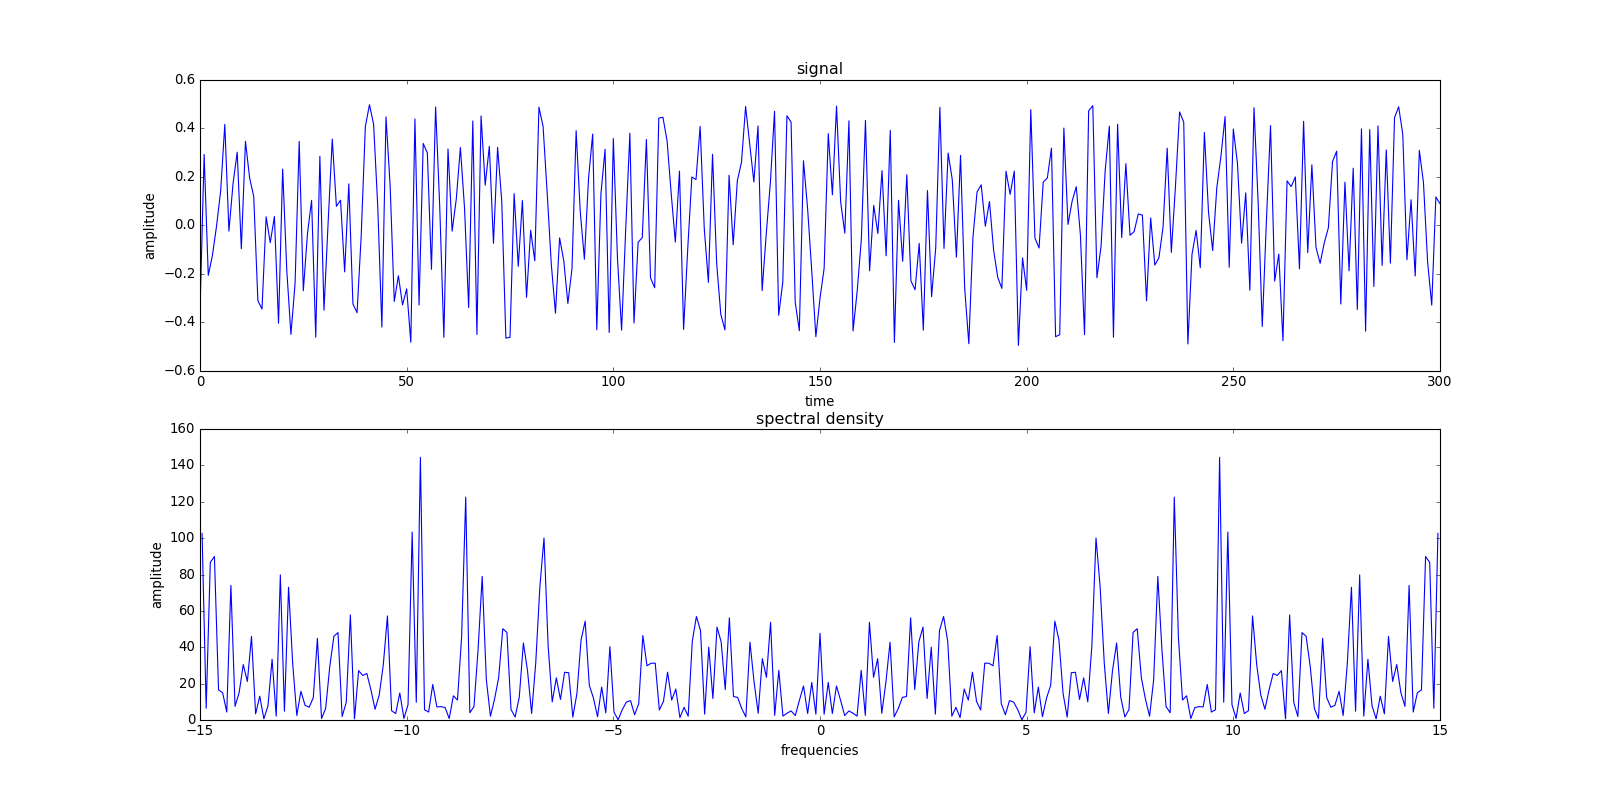

In [3]:
data =  np.random.rand(301) - 0.5

#data = np.random.randn(301)
ps = np.abs(np.fft.fft(data))**2

time_step = 1 / 30
freqs = np.fft.fftfreq(data.size, time_step)
idx = np.argsort(freqs)

fig = plt.figure(figsize=(20,10))

fig.add_subplot(211)
plt.plot(data)
plt.title('signal')
plt.xlabel('time')
plt.ylabel('amplitude')

fig.add_subplot(212)
plt.plot(freqs[idx], ps[idx])
plt.xlabel('frequencies')
plt.ylabel('amplitude')
plt.title('spectral density')

plt.savefig('../images/sd_psd.png')

In [4]:
plt.close()

<IPython.core.display.Javascript object>


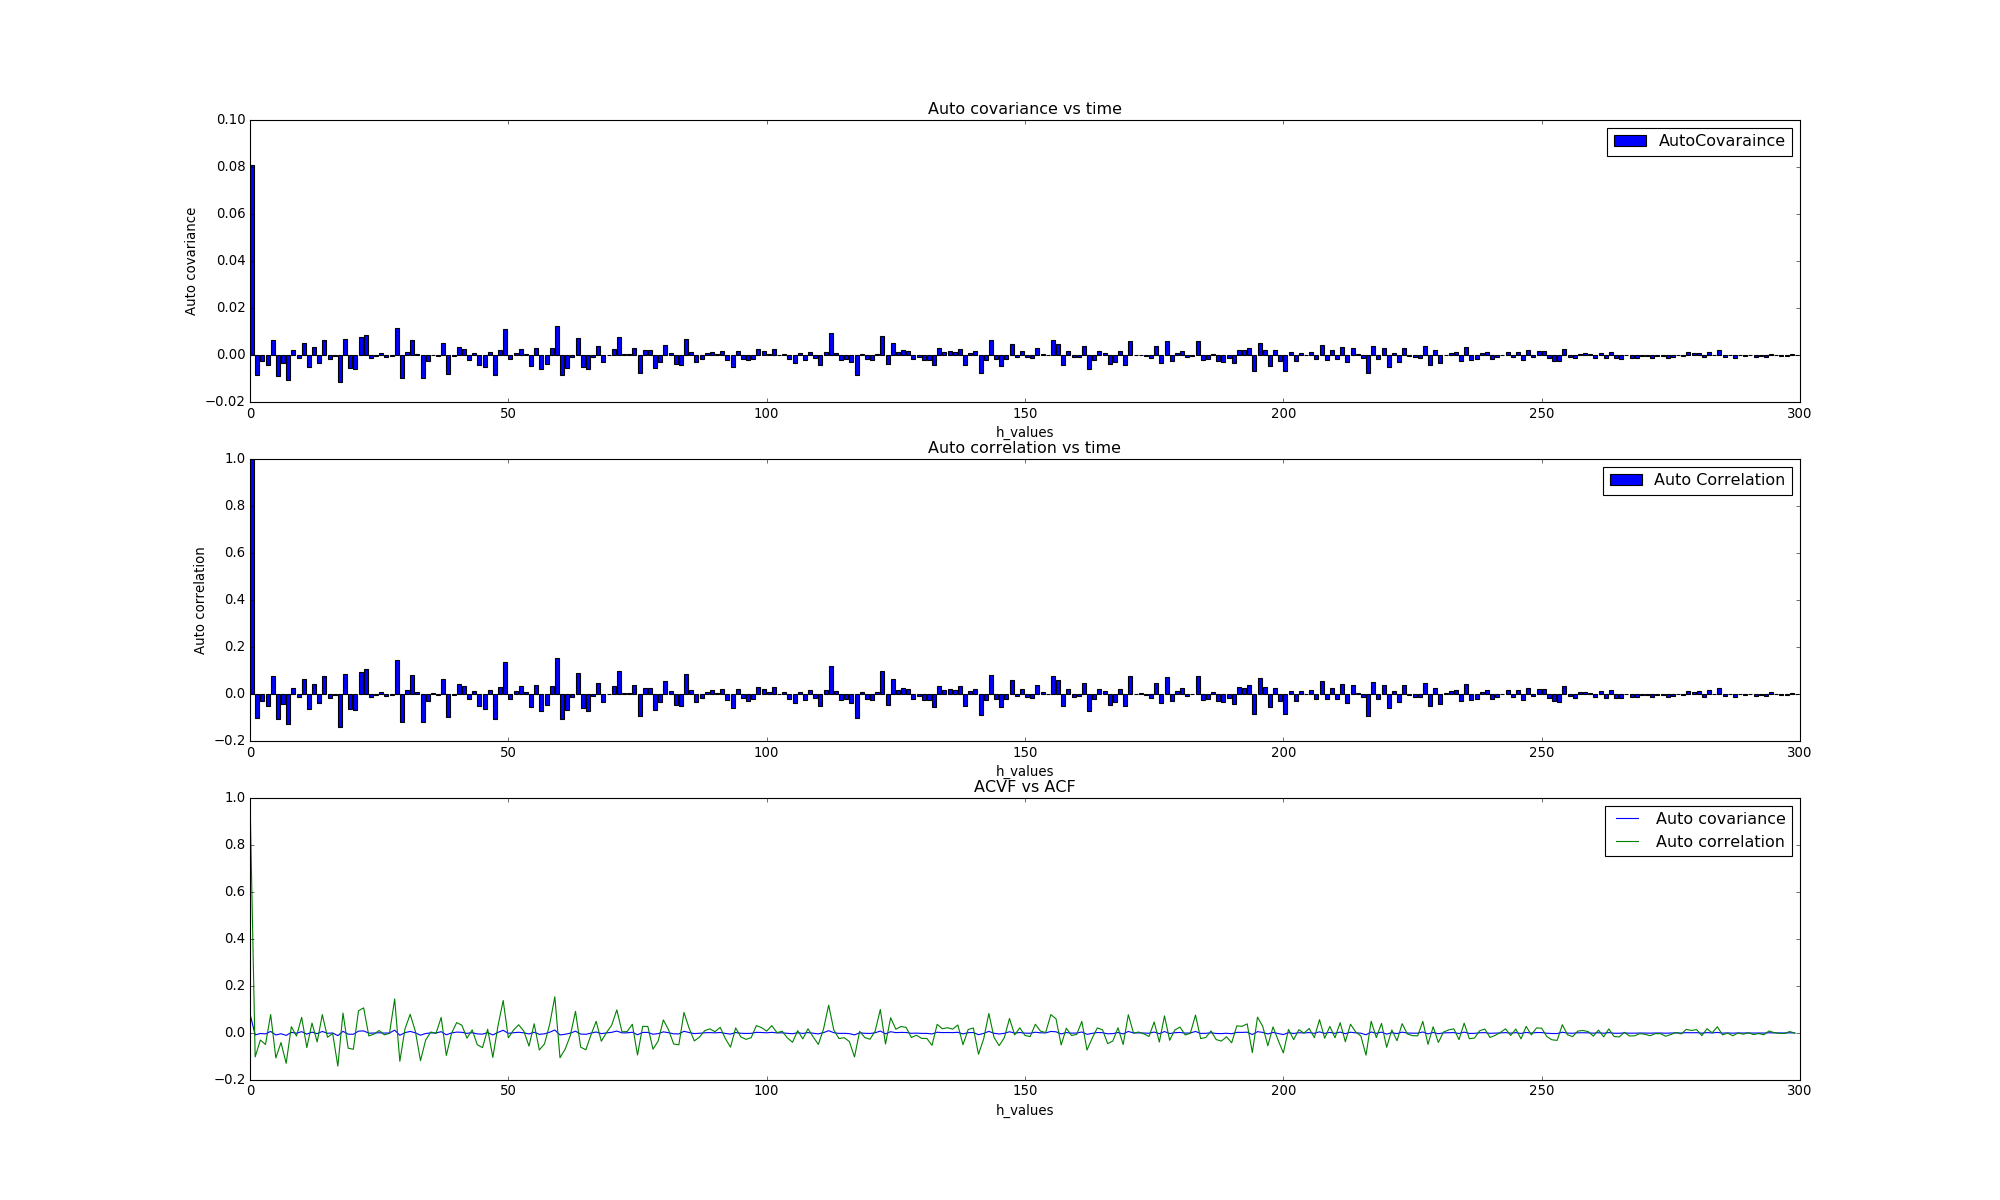

In [5]:
auto_covariance = get_auto_covariance(data)
auto_correlation = get_auto_correlation(data)

h_vals = np.arange(0, data.shape[0]-1)
covars = np.empty(h_vals.shape[0])
correls = np.empty(h_vals.shape[0])

for i in range(0, h_vals.shape[0]):
    covars[i] = get_auto_covariance(data, h_vals[i])
    correls[i] = get_auto_correlation(data, h_vals[i])

fig = plt.figure(figsize=(25,15))

fig.add_subplot(311)
plt.bar(h_vals, covars, label="AutoCovaraince")
plt.xlabel('h_values')
plt.ylabel('Auto covariance')
plt.title('Auto covariance vs time')
plt.legend()

fig.add_subplot(312)
plt.bar(h_vals, correls, label="Auto Correlation")
plt.xlabel('h_values')
plt.ylabel('Auto correlation')
plt.title('Auto correlation vs time')
plt.legend()

fig.add_subplot(313)
plt.plot(covars, label="Auto covariance")
plt.plot(correls, label="Auto correlation")
plt.title("ACVF vs ACF")
plt.xlabel("h_values")
plt.legend()

plt.savefig('../images/sd_acf_acvf.png')

In [6]:
plt.close()

In [7]:
def get_spectral_density(X, l):
    sd = 0;
    for h in range(0, X.shape[0]):
        sd = sd + (np.power(math.e, h*l*1j)*get_auto_covariance(X, h))
    sd/(2*math.pi)
    return sd

In [8]:
lambdas = np.linspace(-math.pi, math.pi, 200)
densities = np.empty(lambdas.shape[0])
for i in range(0, lambdas.shape[0]):
    densities[i] = get_spectral_density(data, lambdas[i])
    if(i % 10 == 0):
        print("Finished iteration ", i)

Finished iteration  0
Finished iteration  10
Finished iteration  20
Finished iteration  30
Finished iteration  40
Finished iteration  50
Finished iteration  60
Finished iteration  70
Finished iteration  80
Finished iteration  90
Finished iteration  100
Finished iteration  110
Finished iteration  120
Finished iteration  130
Finished iteration  140
Finished iteration  150
Finished iteration  160
Finished iteration  170
Finished iteration  180
Finished iteration  190


/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:4: ComplexWarning: Casting complex values to real discards the imaginary part


<IPython.core.display.Javascript object>


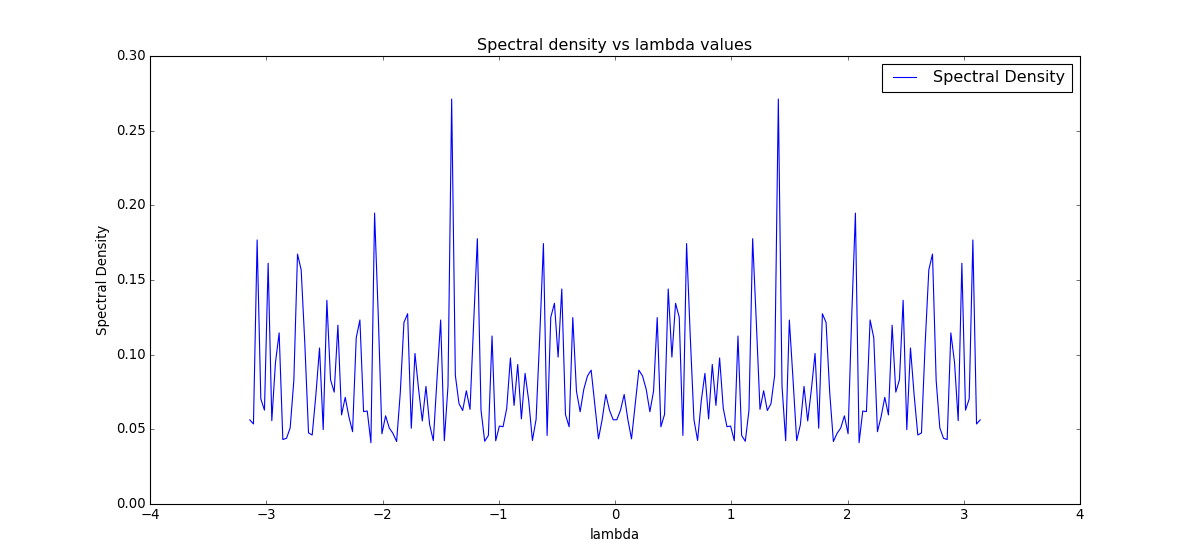

In [9]:
plt.figure(figsize=(15,7))
plt.plot(lambdas, densities, label="Spectral Density")
plt.xlabel('lambda')
plt.ylabel('Spectral Density')
plt.title('Spectral density vs lambda values')
plt.legend()

plt.savefig('../images/sd_sd.png')

In [12]:
plt.close()

### Observations

* The spectral density function is even.  $f(\lambda) = f(-\lambda)$
* $ f(-\lambda) \ge 0 $ for all $\lambda \in (-\pi , \pi]$

In [14]:
def get_gamma_from_sd():
    return 0

array([ 0.05633563,  0.05358774,  0.17682331,  0.07040186,  0.06285454,
        0.16121275,  0.0558132 ,  0.09487416,  0.11458621,  0.04317305,
        0.04399938,  0.0509111 ,  0.08274528,  0.16735907,  0.15678592,
        0.10713913,  0.04762589,  0.04619303,  0.07296057,  0.10449037,
        0.04981989,  0.13640549,  0.0832232 ,  0.07492184,  0.11974861,
        0.05964921,  0.07143591,  0.05843222,  0.04841363,  0.11128134,
        0.12325789,  0.0618662 ,  0.06226855,  0.04103694,  0.19481088,
        0.12632283,  0.04703246,  0.05904085,  0.05090902,  0.04732196,
        0.04182299,  0.07445017,  0.12157966,  0.12743108,  0.05072567,
        0.1008394 ,  0.07665578,  0.05562792,  0.07875363,  0.05306153,
        0.04244862,  0.08349983,  0.12321311,  0.04238293,  0.07901693,
        0.27116969,  0.08614136,  0.06720521,  0.06261823,  0.07584498,
        0.06336895,  0.12184253,  0.17765815,  0.06278374,  0.04199248,
        0.04589765,  0.11248399,  0.04234831,  0.05219151,  0.05